<a href="https://colab.research.google.com/github/heeeeee0129/2022S-ML/blob/main/HW4_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW4 :: DNN**
## 과제 목표
* 간단한 Three Layer Network를 구현하기
* Pytorch를 사용하여 DNN 구현 후 학습과 테스트하기
  
  
   



⭐  이번 과제는 bb에 코랩 링크, ipynb 파일만 업로드합니다(HW3와 동일하게).   
⭐  작성한 코드에 **간단한 주석을 반드시 달아주세요**!  
⭐  코딩할 부분을 제외하고는 수정하지 마세요. 수정 시 감점입니다.

## **문제 1 - Three Layer Network**
```class Sigmoid```와 ```Affine```을 구현한 후 이 두 class를 사용하여 ```class ThreeLayerNet```를 완성하세요. 
* 코드 참고 : deep learning from scratch

### 문제 1-1
class sigmoid의 forward 함수를 구현하세요.  
힌트) sigmoid 함수 식

In [30]:
import numpy as np


class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):

      #############################################
      ################### 문제 1-1 #################
      ############# sigmoid forward 구현 ###########
      #############################################
        # 한 줄로 구현
        result = (1/(1+np.exp(-x))) ## 시그모이드 함수 식: S(x) = 1/(1+e^(-x))
      #############################################
      
        return result


### 문제 1-2
class Affine의 forward 함수를 구현하세요.  
힌트) affine 함수 식

In [31]:
class Affine: # Affine은 Fully Connect를 의미합니다
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
      
      #############################################
      ################### 문제 1-2 #################
      ############# affine forward 구현 ############
      #############################################
        # 코드 작성
        W, b = self.params
        out = np.matmul(x,W)+b   ## 아핀 변환: Y = WX + b
      #############################################
      
        return out


### 문제 1-3

  각 layer의 parameter를 ```np.random.randn()``` 를 사용하여 초기화하세요.  
  * 조건) ```class ThreeLayerNet```은 총 3개의 fully connected layer로 구성됩니다.
  * 힌트) 차원을 잘 고려하세요. 


### 문제 1-4
  문제1-1, 2에서 구현한 class를 사용하여 ThreeLayerNet의 layer를 구성하세요.
  * 조건) ```class ThreeLayerNet```은 총 3개의 fully connected layer로 구성됩니다.
  * 힌트) 차원을 잘 고려하세요.

In [32]:
class ThreeLayerNet:
    def __init__(self, input_size, first_hidden_size, second_hidden_size, output_size):
        I, H_1, H_2,O = input_size, first_hidden_size, second_hidden_size, output_size

      #############################################
      ################### 문제 1-3 #################
      ######### parameter initialization ##########
      #############################################
        # 코드 작성
        ## 파라미터 초기화
        Wh_1 = np.random.randn(I, H_1)        ## 크기가 (I, H_1) 인 랜덤 숫자로 초기화
        bh_1 = np.random.randn(H_1)           ## 크기가 (H_1) 인 랜덤 숫자로 초기화
        Wh_2 = np.random.randn(H_1, H_2)      ## 크기가 (H_1, H_2) 인 랜덤 숫자로 초기화
        bh_2 = np.random.randn(H_2)           ## 크기가 (H_2) 인 랜덤 숫자로 초기화
        Wy = np.random.randn(H_2, O)          ## 크기가 (H_2, O) 인 랜덤 숫자로 초기화
        by = np.random.randn(O)               ## 크기가 (O) 인 랜덤 숫자로 초기화

      #########################################
        

        self.layers = [
        #############################################
        ################### 문제 1-4 #################
        ############### stack layers ################
        #############################################          
            # 코드 작성
            Affine(Wh_1, bh_1),
            Sigmoid(),
            Affine(Wh_2, bh_2),
            Sigmoid(),
            Affine(Wy, by)           ## 레이어 쌓기-! 

        #############################################    
        ]

        # 모든 weight 를 담은 리스트 생성
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [33]:
# dummy data로 모델 실행해보기
x = np.random.randn(784, 100)
model = ThreeLayerNet(100, 50, 30, 10)
s = model.predict(x)
print(s)

[[ 5.70417067  9.26458337  0.27811591 ...  0.307068    9.01537244
  -4.2767198 ]
 [ 2.04409276  3.77640463 -2.80158859 ...  2.29165827  6.14371699
  -0.48198112]
 [ 2.3251568   5.72820729 -2.85673085 ...  3.4731695   6.84707018
  -2.32705347]
 ...
 [ 2.78092886  3.63683114 -2.57442679 ...  7.70120665  7.12993321
   1.25650076]
 [ 4.79991698  4.01636002 -0.13673985 ...  3.85023885  7.18491696
  -0.11706385]
 [ 5.35879345  5.04285153 -1.11042905 ... -1.48551811  6.70613682
  -4.51174366]]




---



## 문제 2 - Implementing DNN using Pytorch
문제 1에서는 Pytorch를 사용하지 않고 DNN을 구현해보았습니다.  
문제 2에서는 Pytorch를 사용하여 DNN을 구현하고 MNIST 데이터로 분류 모델 학습을 진행합니다.
* 코드 참고: pytorch 공식 튜토리얼

In [34]:
# 라이브러리 importing
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn

### **Load Data**

In [35]:
# Load training data
training_data = datasets.MNIST(
    root="data",
    train=True, # training data
    download=True,
    transform=ToTensor() # 이미지를 tensor로 변형
)

# Load test data
test_data = datasets.MNIST(
    root="data",
    train=False, # test data
    download=True,
    transform=ToTensor() # 이미지를 tensor로 변형
)

# data loader
# train, test 각각의 data loader 생성
train_loader = torch.utils.data.DataLoader(training_data, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)

### **Check loaded data**
train_loader를 사용하여 하나의 데이터를 로드한 후 이 데이터가 어떤 숫자의 데이터인지 이미지로 확인해봅니다.

In [36]:
# train feature와 label을 train_loader로부터 가져오기
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([1, 1, 28, 28])
Labels batch shape: torch.Size([1])


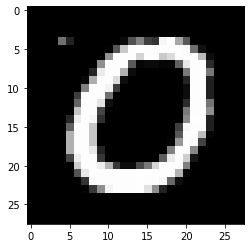

Label: 0


In [37]:
# 이미지로 확인
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### 문제 2-1
4개의 linear layer와 3개의 ReLU layer를 가진 네트워크를 구성하세요.



### 문제 2-2
forward 함수의 빈칸을 구현하세요.

In [38]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten() # 28x28 이미지를 784 픽셀 값의 배열로 변경
        self.linear_relu_stack = nn.Sequential(
            
            nn.Linear(in_features=28*28, out_features=512),
            nn.ReLU(),

            #############################################
            ################### 문제 2-1 #################
            # 4개의 linear layer와 3개의 ReLU layer를 구성하세요
            # (위 Linear 포함 4개, ReLU layer 포함 3개를 의미)
            #############################################
            
            # 시작 차원, 끝 차원 잘 고려하여 작성하기
            # 중간 차원은 임의로 설정 가능
            nn.Linear(in_features = 512, out_features = 256), 
            nn.ReLU(),
            nn.Linear(in_features = 256, out_features = 64),
            nn.ReLU(),
            nn.Linear(in_features = 64, out_features = 10), ## linear 레이어 : 끝차원 10 , linear layer 총 4개, relu layer 총 3개
            ## 최종적으로 10개의 확률적 출력

            #############################################

        )

    def forward(self, x):
        #############################################
        ################### 문제 2-2 #################
        # forward 함수 구현
        #############################################
        # 코드 작성
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)  ## linear_relu_stack: sequential 모듈의 컨테이너. 데이터는 모듈들을 통해 전달됨. 
        #############################################
        return logits # forward 결과 저장

In [39]:
# cpu OR gpu 설정
# gpu가 있을 경우, device로 cuda를 사용함
# colab에서 '런타임 유형 변경'을 하면 gpu 사용할 수 있음
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [40]:
model = NeuralNetwork().to(device) # device로 Network 전송
print(model) # 모델 구조 확인

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [41]:
# 앞에서 출력해보았던 train_features[0](1개의 데이터)에 대해서 모델 학습 결과 확인해보기
logits = model(train_features[0]) # 일부 백그라운드 연산들과 함께 모델의 forward 를 실행 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9])


### **Train the Network** 
epoch과 batch를 활용하여 모델을 학습시켜 봅시다.

### 문제 2-3
모델의 forward, backward, optimize 하는 부분을 주어진 칸에 구현하세요.

In [42]:
model = NeuralNetwork().to(device)

In [43]:
# hyperparameter 설정
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # optimizer

n_epoch = 3 # the number of epochs
n_batch = 32 # the number of batches

In [44]:
# loader 설정하기
train_loader = torch.utils.data.DataLoader(training_data, batch_size=n_batch, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=n_batch, shuffle=True)

In [45]:
for epoch in range(n_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        # input data 가져오기
        # data 는 [inputs, labels]로 구성된 리스트
        inputs, labels = data

        # optimizer의 파라미터 gradient를 0으로 설정
        optimizer.zero_grad()

        #############################################
        ################### 문제 2-3 #################
        # forward, backward, optimize 
        #############################################
          # 코드 작성
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   ## loss의 Gradient 계산
        optimizer.step() ## 최적화

        #############################################

        # loss 출력
        running_loss += loss.item()
        if i % n_batch == 0:    # print every n_batch mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / n_batch:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.072
[1,    33] loss: 2.309
[1,    65] loss: 2.302
[1,    97] loss: 2.299
[1,   129] loss: 2.294
[1,   161] loss: 2.291
[1,   193] loss: 2.291
[1,   225] loss: 2.285
[1,   257] loss: 2.283
[1,   289] loss: 2.277
[1,   321] loss: 2.270
[1,   353] loss: 2.266
[1,   385] loss: 2.259
[1,   417] loss: 2.251
[1,   449] loss: 2.242
[1,   481] loss: 2.233
[1,   513] loss: 2.221
[1,   545] loss: 2.213
[1,   577] loss: 2.192
[1,   609] loss: 2.173
[1,   641] loss: 2.144
[1,   673] loss: 2.132
[1,   705] loss: 2.090
[1,   737] loss: 2.060
[1,   769] loss: 2.021
[1,   801] loss: 1.958
[1,   833] loss: 1.904
[1,   865] loss: 1.819
[1,   897] loss: 1.736
[1,   929] loss: 1.649
[1,   961] loss: 1.557
[1,   993] loss: 1.437
[1,  1025] loss: 1.358
[1,  1057] loss: 1.263
[1,  1089] loss: 1.178
[1,  1121] loss: 1.095
[1,  1153] loss: 1.073
[1,  1185] loss: 0.992
[1,  1217] loss: 0.964
[1,  1249] loss: 0.938
[1,  1281] loss: 0.901
[1,  1313] loss: 0.815
[1,  1345] loss: 0.812
[1,  1377] 

### **Test the Network**

In [46]:
# test feature와 label을 test_loader로부터 가져오기
test_features, test_labels = next(iter(test_loader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


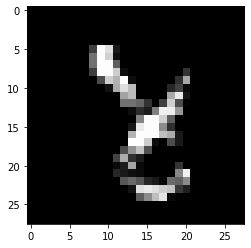

Predicted class: tensor([8])
Label: 8


In [47]:
# 1개 이미지 확인해보기

logits = model(test_features[0]) # 일부 백그라운드 연산들과 함께 모델의 forward 를 실행 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)


img = test_features[0].squeeze()
label = test_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Predicted class: {y_pred}")
print(f"Label: {label}")

In [48]:
# 전체 test data에 대한 결과 확인
correct = 0
total = 0

with torch.no_grad(): # 모델을 학습하는 것이 아니므로 gradient 계산을 할 필요가 없음
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 92 %
